In [2]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

n = 10000
a = torch.ones([n])
b = torch.ones([n])

class Timer:    #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """"启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表当中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]
    
    def avg(self):
        """"返回平均时间"""
        return sum(self.times) / len(self.times)
    
    def sum(self):
        """"返回时间总和"""
        return sum(self.times)
    
    def cumsum(self):
        """"返回累计时间"""
        return np.array(self.times).cumsum().tolist()

In [3]:
c = torch.zeros([n])
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]

f'{timer.stop():.10f}secs'

'0.0945119858secs'

In [4]:
timer.start()
d = a + b
f'{timer.stop():.10f}secs'

'0.0009996891secs'

features: tensor([-0.0398, -1.3004]) 
label: tensor([8.5398])


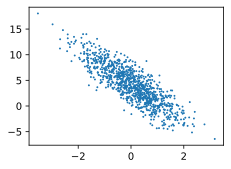

In [5]:
import torch

def synthetic_date(w,b,num_examples):   #@save
    """"生成y = Xw + b + 噪声"""
    X = torch.normal(0,1,(num_examples,len(w)))
    y = torch.matmul(X,w) + b   #实现矩阵与向量之间5种乘法操作
    y += torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = synthetic_date(true_w,true_b,1000)
print('features:',features[0],'\nlabel:',labels[0])

d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].detach().numpy(),labels.detach().numpy(),1)

In [6]:
import random
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)    #随机读取数据
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]


In [7]:
batch_size = 10

for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([[ 0.6234,  0.4741],
        [ 0.5905,  0.5988],
        [ 0.4044, -0.1150],
        [ 0.5198, -0.0560],
        [ 0.5928,  0.5227],
        [-0.1868,  0.6856],
        [ 0.1996, -1.6388],
        [ 0.9343,  0.1426],
        [-0.4596,  1.4702],
        [-1.9748, -0.1311]]) 
 tensor([[ 3.8227],
        [ 3.3118],
        [ 5.4080],
        [ 5.4312],
        [ 3.6267],
        [ 1.4975],
        [10.1671],
        [ 5.5781],
        [-1.7194],
        [ 0.6987]])


In [8]:
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)
print(w)
#初始化模型参数

tensor([[-0.0024],
        [-0.0128]], requires_grad=True)


In [9]:
def linreg(X,w,b):  #@save
    """"定义线性回归模型"""
    return torch.matmul(X,w) + b

In [10]:
def squared_lost(y_hat,y):    #@save
    """"均方损失"""
    return(y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [11]:
def sgd(params,lr,batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()#清楚梯度值

with torch.no_grad的作用:
在该模块下，所有计算得出的tensor的requires_grad都自动设置为False。

In [12]:
#模型主要训练部分
lr = 0.03 #学习速率
num_epochs = 300 #迭代周期个数
net = linreg
loss = squared_lost

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch{epoch + 1},loss{float(train_l.mean()):f}')
        


epoch1,loss0.052764
epoch2,loss0.000239
epoch3,loss0.000048
epoch4,loss0.000048
epoch5,loss0.000048
epoch6,loss0.000048


epoch7,loss0.000048
epoch8,loss0.000048
epoch9,loss0.000048
epoch10,loss0.000048
epoch11,loss0.000047
epoch12,loss0.000048
epoch13,loss0.000048
epoch14,loss0.000048
epoch15,loss0.000048
epoch16,loss0.000047
epoch17,loss0.000048
epoch18,loss0.000048
epoch19,loss0.000048
epoch20,loss0.000048
epoch21,loss0.000048
epoch22,loss0.000048
epoch23,loss0.000048
epoch24,loss0.000048
epoch25,loss0.000048
epoch26,loss0.000047
epoch27,loss0.000048
epoch28,loss0.000048
epoch29,loss0.000048
epoch30,loss0.000048
epoch31,loss0.000048
epoch32,loss0.000048
epoch33,loss0.000048
epoch34,loss0.000048
epoch35,loss0.000048
epoch36,loss0.000048
epoch37,loss0.000048
epoch38,loss0.000047
epoch39,loss0.000048
epoch40,loss0.000048
epoch41,loss0.000048
epoch42,loss0.000048
epoch43,loss0.000048
epoch44,loss0.000048
epoch45,loss0.000048
epoch46,loss0.000048
epoch47,loss0.000048
epoch48,loss0.000048
epoch49,loss0.000048
epoch50,loss0.000048
epoch51,loss0.000048
epoch52,loss0.000048
epoch53,loss0.000048
epoch54,loss0.00

In [14]:
print(f'w的估计误差:{true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差:{true_b - b}')
print(w)

w的估计误差:tensor([ 1.1790e-04, -9.7752e-05], grad_fn=<SubBackward0>)
b的估计误差:tensor([-0.0001], grad_fn=<RsubBackward1>)
tensor([[ 1.9999],
        [-3.3999]], requires_grad=True)
